# Exploration

In [1]:
import pickle
import pandas as pd
import datetime
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import json
import pycountry

## Bring in homes

In [2]:
with open("TAGGED_HOMES.pkl", 'rb') as picklefile:
    homes = pickle.load(picklefile)

In [8]:
homes = homes.drop(['doc_id', 'sen_num_h_t', 'final_number' , 'final_verb'])

In [9]:
homes.shape

(18767, 18)

In [29]:
homes.head()

,doc_id,date_x,date_y,image,url,decode_text,sentence_number,sen_num_h_t,chunk_num,chunks,house_numbers,final_number,verb,final_verb,doc_word_tokens,countries,one_country,homes_tags,date,month
2,21,2016-06-04 00:36:56,20160603040000,http://sharing.wkbw.com/sharescnn/photo/2016/0...,http://www.wkbw.com/news/national/three-soldie...,"FORT HOOD, Texas (AP) Army teams and emergenc...",1,"In Fort Bend County, southwest of Houston, abo...",0,"[1,400, homes, affected, heavy]","[1,400]",1400.0,[affected],affected,"[FORT, HOOD, Texas, AP, Army, teams, emergency...",[Singapore],Singapore,Disasters,2016-06-03,6
5,81,2016-03-12 19:12:47,20160312160000,http://sharing.wcpo.com/sharescnn/photo/2016/0...,http://www.wcpo.com/news/national/louisiana-mi...,"COVINGTON, La. (AP) Residents in Louisiana an...",0,Other states in the region have also been affe...,0,"[300, homes, flooded]",[300],300.0,[],None,"[COVINGTON, La, AP, Residents, Louisiana, Miss...",[],None,Disasters,2016-03-12,3
13,128,NaT,20161221034500,http://img-s-msn-com.akamaized.net/tenant/amp/...,http://www.msn.com/en-ie/news/world/israeli-po...,Provided by AFP Several hundred young Jewish ...,0,When the residents rejected a government propo...,0,"[12, families, several]",[12],12.0,[],None,"[Provided, AFP, Several, hundred, young, Jewis...","[Israel, Israel, Israel, Israel]",Israel,Disasters,2016-12-21,12
19,138,2016-10-31 00:00:00,20161031114500,,http://humanitariannews.org/20161031/philippin...,Source: UN Office for the Coordination of Huma...,0,"31,000 people displaced INDONESIA Between 29...",1,"[5,000, houses, flooded]","[5,000]",5000.0,[],None,"[Source, UN, Office, Coordination, Humanitaria...","[Indonesia, Myanmar, Philippines, Philippines]",Philippines,Disasters,2016-10-31,10
24,170,2016-07-05 00:00:00,20160704234500,http://i.ce.cn/english/main/latest/201607/05/W...,HTTP://en.ce.cn/main/latest/201607/05/t2016070...,Rescuers reinforce a temporary dyke in Shuren ...,0,Continuous rainfall since June 30 has destroye...,1,"[22,000, houses, forced]","[22,000]",22000.0,[forced],forced,"[Rescuers, reinforce, temporary, dyke, Shuren,...","[China, China, China]",China,Disasters,2016-07-04,7


In [19]:
# Datetime
def format_date(x):
    x = datetime.datetime.strptime(str(x), "%Y%m%d%H%M%S")
    return x.date()

In [20]:
homes["date"] = homes.date_y.apply(format_date)
homes['month'] =  homes.date.apply(lambda x: x.month)

## Homes - Group by country and month

In [37]:
# Group by country and month
home_country_months_count = pd.DataFrame(homes.groupby(['one_country', 'month']).final_number.count())

In [48]:
home_country_months_count = home_country_months_count.reset_index()
home_country_months_count.head()

,one_country,month,final_number
0,Afghanistan,1,3
1,Afghanistan,2,2
2,Afghanistan,3,1
3,Afghanistan,4,11
4,Afghanistan,5,5


In [154]:
# Test on AFG
AFG = home_country_months_count[home_country_months_count['one_country'] == 'Afghanistan']
AFG.shape

(12, 3)

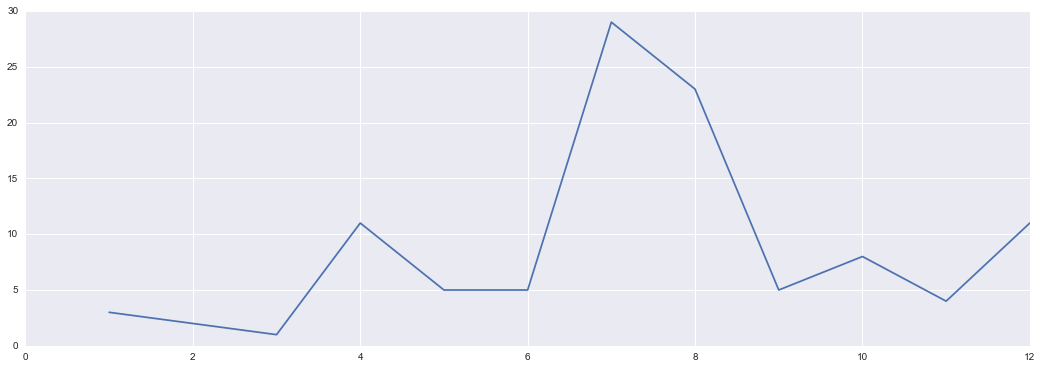

In [159]:
fig, ax = plt.subplots(figsize=(18,6))
x = AFG.month
y = AFG.final_number

plt.plot(x,y)

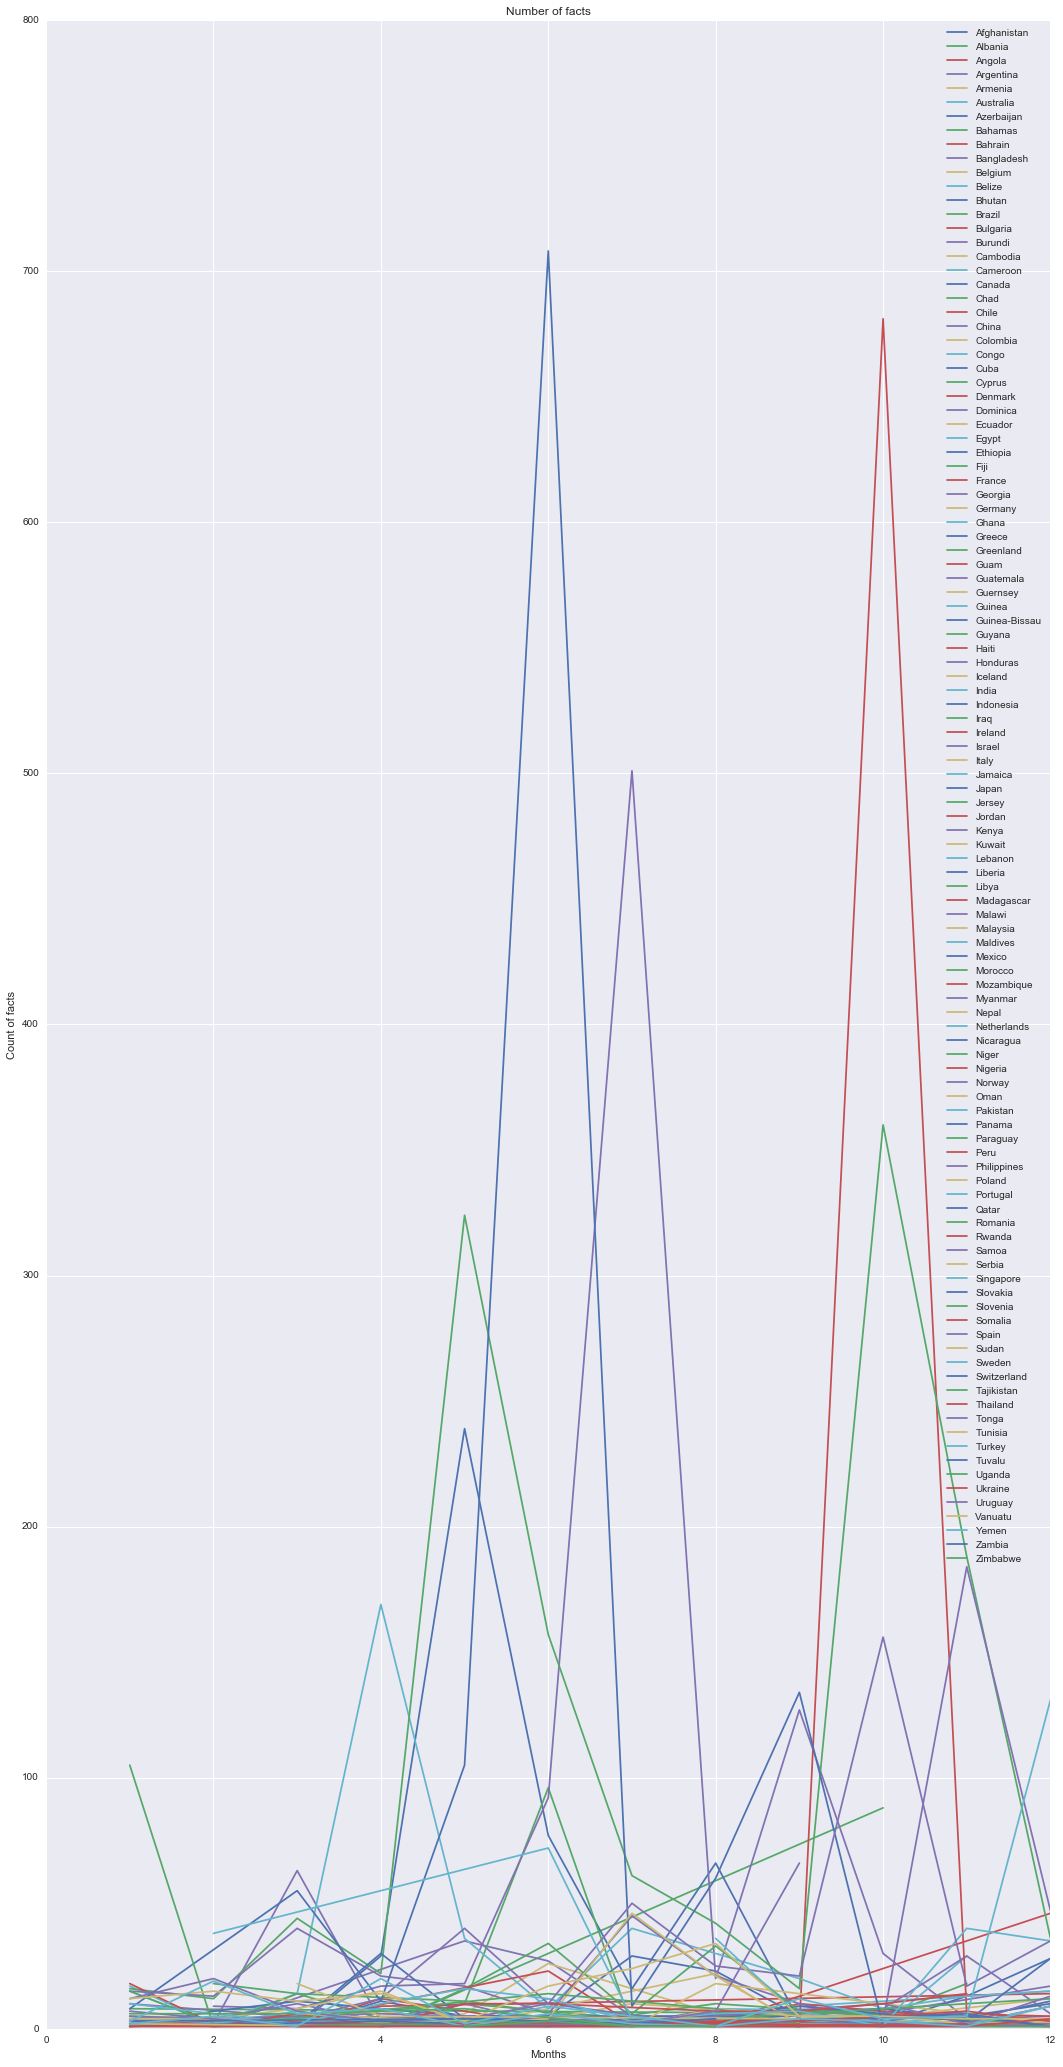

In [173]:
# All countries
fig, ax = plt.subplots(figsize=(18,36))
groups = home_country_months_count.groupby('one_country')
for name, gp in groups:
    ax.plot(gp.month, gp.final_number, linestyle="-", ms=12, label=name)
ax.legend()

plt.title("Number of facts")
plt.ylabel("Count of facts")
plt.xlabel("Months")

## Homes - Group by country, tag, and month

In [86]:
# Groupbys
home_country_tag_months_count = pd.DataFrame(homes.groupby(['one_country', 'homes_tags','month']).final_number.count())
home_country_tag_months_count = home_country_tag_months_count.reset_index()

In [104]:
home_country_tag_months_count.rename(columns={'homes_tags': 'tags'}, inplace=True)
home_country_tag_months_count.head()

,one_country,tags,month,final_number
0,Afghanistan,Conflict and violence,1,1
1,Afghanistan,Conflict and violence,4,1
2,Afghanistan,Conflict and violence,6,1
3,Afghanistan,Conflict and violence,8,1
4,Afghanistan,Conflict and violence,9,1


In [178]:
Mexico = home_country_tag_months_count[home_country_tag_months_count['one_country'] == "Mexico"]
Mexico.shape

(15, 4)

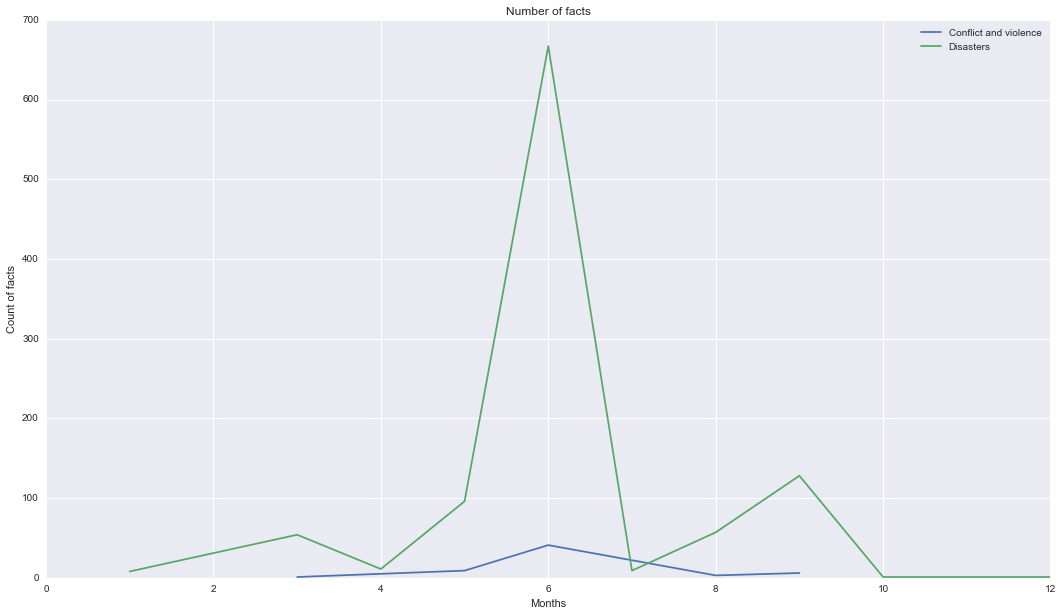

In [179]:
fig, ax = plt.subplots(figsize=(18,10))
groups = Mexico.groupby('tags')
for name, gp in groups:
    ax.plot(gp.month, gp.final_number, linestyle="-", ms=12, label=name)
ax.legend()

plt.title("Number of facts")
plt.ylabel("Count of facts")
plt.xlabel("Months")

## Homes - Group by country, tag, and month ... add number + sentence + url

In [134]:
totalnum_home_country_tag_months = pd.DataFrame(homes.groupby(['one_country', 'homes_tags','month',
                                                               'url', 'sen_num_h_t']).final_number.sum())

In [180]:
totalnum_home_country_tag_months.head(1)

,,,,,final_number
one_country,homes_tags,month,url,sen_num_h_t,
Afghanistan,Conflict and violence,1,http://www.indiablooms.com/ibns_new/world-details/SA/5370/afghanistan-un-helps-humanitarian-aid-reach-war-affected-families-in-kunduz.html,"New York, Dec 29 (Just Earth News/IBNS): The United Nations and its partners have helped deliver humanitarian aid packages to over 100 families affected by the recent fighting in the Kunduz area of northern Afghanistan, according to the UN mission in the country.",100.0


## Bring in people

In [14]:
with open("TAGGED_PEOPLE.pkl", 'rb') as picklefile:
    people = pickle.load(picklefile)

In [15]:
people.shape

(105450, 18)

In [17]:
people = people.drop(['doc_id', 'sen_num_p_t', 'final_number' , 'final_verb'])

In [70]:
people.shape

(105450, 20)

In [31]:
people.head()

,doc_id,date_x,date_y,image,url,decode_text,sentence_number,sen_num_p_t,chunk_num,chunks,people_numbers,final_number,verb,final_verb,doc_word_tokens,countries,one_country,people_tags,date,month
0,10,2016-01-28 19:47:17,20160128160000,http://i.dailymail.co.uk/i/pix/2016/01/28/arti...,http://www.dailymail.co.uk/wires/pa/article-34...,Storm Gertrude set to sweep in with 90mph gust...,0,Around 600 people were evacuated from their ho...,0,"[600, people, evacuated]",[600],600.0,[evacuated],evacuated,"[Storm, Gertrude, set, sweep, 90mph, gusts, St...","[Ireland, Ireland]",Ireland,Disasters,2016-01-28,1
1,12,2016-10-10 21:28:02,20161010080000,http://cmgfeeds.cmgdigital.com/photo/2016/10/1...,http://www.kiro7.com/news/national/aftereffect...,"by: EMERY P. DALESIO and MARTHA WAGGONER, Asso...",1,"About 1,500 people had to be rescued early Mon...",0,"[1,500, people, rescued, early]","[1,500]",1500.0,[rescued],rescued,"[EMERY, P., DALESIO, MARTHA, WAGGONER, Associa...","[Haiti, Georgia, Georgia, Georgia]",Georgia,Disasters,2016-10-10,10
2,21,2016-06-04 00:36:56,20160603040000,http://sharing.wkbw.com/sharescnn/photo/2016/0...,http://www.wkbw.com/news/national/three-soldie...,"FORT HOOD, Texas (AP) Army teams and emergenc...",0,"""With the rain that's predicted, that's not go...",0,"[700, people, evacuated]",[700],700.0,[evacuated],evacuated,"[FORT, HOOD, Texas, AP, Army, teams, emergency...",[Singapore],Singapore,Disasters,2016-06-03,6
3,25,NaT,20160327200000,http://www.ekathimerini.com/resources/2016-03/...,http://www.ekathimerini.com/207360/article/eka...,Pope Francis on Sunday spoke out against the r...,0,Syrias five-year conflict has killed more than...,0,"[270,000, people, forced]","[270,000]",270000.0,[forced],forced,"[Pope, Francis, Sunday, spoke, rejection, refu...","[Turkey, Turkey, Turkey, Turkey, Greece, Belgi...",Turkey,Conflict and violence,2016-03-27,3
4,25,NaT,20160327200000,http://www.ekathimerini.com/resources/2016-03/...,http://www.ekathimerini.com/207360/article/eka...,Pope Francis on Sunday spoke out against the r...,1,The shutdown has led to a bottleneck at the Gr...,0,"[11,500, people, stranded, squalid]","[11,500]",11500.0,[],None,"[Pope, Francis, Sunday, spoke, rejection, refu...","[Turkey, Turkey, Turkey, Turkey, Greece, Belgi...",Turkey,Conflict and violence,2016-03-27,3


In [21]:
people["date"] = people.date_y.apply(format_date)
people['month'] =  people.date.apply(lambda x: x.month)

## People - Group by country and month

In [40]:
# Group by country and month
people_country_months_count = pd.DataFrame(people.groupby(['one_country', 'month']).final_number.count())

In [282]:
people_country_months_count = people_country_months_count.reset_index()
people_country_months_count.head(13)

,one_country,month,final_number
0,Afghanistan,1,24
1,Afghanistan,2,14
2,Afghanistan,3,4
3,Afghanistan,4,4
4,Afghanistan,5,46
5,Afghanistan,6,248
6,Afghanistan,7,13
7,Afghanistan,8,43
8,Afghanistan,9,99
9,Afghanistan,10,136


## People - Group by country, tag, and month

In [94]:
people_country_tag_months_count = pd.DataFrame(people.groupby(['one_country', 'people_tags','month']).final_number.count())
people_country_tag_months_count = people_country_tag_months_count.reset_index()

In [101]:
people_country_tag_months_count.rename(columns={'people_tags': 'tags'}, inplace=True)
people_country_tag_months_count.head()

,one_country,tags,month,final_number
0,Afghanistan,Conflict and violence,1,2
1,Afghanistan,Conflict and violence,2,3
2,Afghanistan,Conflict and violence,4,1
3,Afghanistan,Conflict and violence,5,1
4,Afghanistan,Conflict and violence,6,25


## People - Group by country, tag, and month ... add number + sentence + url

In [137]:
totalnum_people_country_tag_months = pd.DataFrame(people.groupby(['one_country', 'people_tags','month',
                                                               'url', 'sen_num_p_t']).final_number.sum())

In [400]:
totalnum_people_country_tag_months.to_csv('article_dashboard.csv')

In [8]:
totalnum_people_country_tag_months = pd.DataFrame.from_csv("article_dashboard.csv")
totalnum_people_country_tag_months=totalnum_people_country_tag_months.reset_index()
totalnum_people_country_tag_months.shape

(73190, 6)

In [9]:
totalnum_people_country_tag_months.head(1)

,one_country,people_tags,month,url,sen_num_p_t,final_number
0,Afghanistan,Conflict and violence,1,http://thestringer.com.au/surveillance-and-sur...,"In 2015, 1.2 million Afghans were internally d...",160000.0


In [10]:
totalnum_people_country_tag_months.to_json("article_dashboard.json")

In [20]:
secondtry = totalnum_people_country_tag_months.to_dict(orient='records')

with open("articles_list.json", 'wb') as outfile:
    json.dump(secondtry, outfile)

# Concat homes and peoples

In [55]:
# Concat counts
fact_count_homes_people = pd.concat([home_country_months_count, people_country_months_count])

In [97]:
# Sanity check
fact_count_homes_people[fact_count_homes_people['one_country'] == "Afghanistan"].head()

,one_country,month,final_number
0,Afghanistan,1,3
1,Afghanistan,2,2
2,Afghanistan,3,1
3,Afghanistan,4,11
4,Afghanistan,5,5


In [399]:
# Concat counts with tags
tagged_fact_count_homes_people = pd.concat([home_country_tag_months_count, people_country_tag_months_count])
tagged_fact_count_homes_people.head(20)

,one_country,tags,month,final_number
0,Afghanistan,Conflict and violence,1,1
1,Afghanistan,Conflict and violence,4,1
2,Afghanistan,Conflict and violence,6,1
3,Afghanistan,Conflict and violence,8,1
4,Afghanistan,Conflict and violence,9,1
5,Afghanistan,Disasters,1,2
6,Afghanistan,Disasters,2,2
7,Afghanistan,Disasters,3,1
8,Afghanistan,Disasters,4,10
9,Afghanistan,Disasters,5,5


In [398]:
tagged_fact_count_homes_people.final_number.sum()

85683

In [396]:
cv = tagged_fact_count_homes_people[tagged_fact_count_homes_people['tags'] == "Conflict and violence"]
cv.groupby(['month']).final_number.sum()

month
1      342
2      484
3      332
4      350
5     1001
6      796
7      643
8      844
9      559
10    1424
11     828
12    1193
Name: final_number, dtype: int64

In [397]:
dis = tagged_fact_count_homes_people[tagged_fact_count_homes_people['tags'] == "Disasters"]
dis.groupby(['month']).final_number.sum()

month
1      3034
2      3991
3      3171
4      3204
5      9003
6      6892
7      6071
8      6909
9      5139
10    12658
11     6519
12    10296
Name: final_number, dtype: int64

# Countries currently in data

In [359]:
list_country = []
for country in tagged_fact_count_homes_people.one_country:
    list_country.append(country)

In [360]:
len(list_country)

2379

In [361]:
countries = set(list_country)
len(countries)

146

In [362]:
countries = pd.Series(list_country)
countries = pd.DataFrame(countries)
countries = countries.rename(columns={0:"country"})
countries = countries.drop_duplicates()
countries = countries.reset_index()

In [363]:
countries.head()

,index,country
0,0,Afghanistan
1,17,Albania
2,22,Angola
3,24,Argentina
4,32,Armenia


# Fact count of countries

In [192]:
heatmap = pd.pivot_table(fact_count_homes_people, values='final_number', index=['one_country'],
                   columns=['month'], aggfunc=np.sum)

In [193]:
heatmap = heatmap.fillna(value=0) 

In [194]:
heatmap.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                  'September', 'October', 'November', 'December']

In [235]:
heatmap.shape

(146, 13)

In [210]:
test = heatmap.index[0]
test

'Afghanistan'

In [209]:
def abbreviation(x):
    x = pycountry.countries.get(name=x)
    return x.alpha_3       

In [211]:
abbreviation(test)

u'AFG'

In [83]:
heatmap.to_csv("global_facts_heatmap.csv")

In [218]:
country_list = list(heatmap.index)
abbreviation_list = []

for country in country_list:
    abbreviation_list.append(abbreviation(country))

In [219]:
len(abbreviation_list)

146

In [225]:
abb_series = pd.Series(abbreviation_list)

In [226]:
abb_series.head()

0    AFG
1    ALB
2    DZA
3    AGO
4    ATA
dtype: object

In [247]:
heatmap['id_'] = abb_series.values

In [248]:
heatmap.head()

,January,February,March,April,May,June,July,August,September,October,November,December,id,id_
one_country,,,,,,,,,,,,,,
Afghanistan,27.0,16.0,5.0,15.0,51.0,253.0,42.0,66.0,104.0,144.0,72.0,71.0,AFG,AFG
Albania,23.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0,ALB,ALB
Algeria,0.0,0.0,7.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,DZA,DZA
Angola,0.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0,1.0,AGO,AGO
Antarctica,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,ATA,ATA


In [239]:
heatmap.columns

Index([u'January', u'February', u'March', u'April', u'May', u'June', u'July',
       u'August', u'September', u'October', u'November', u'December', u'id'],
      dtype='object')

In [252]:
new_heatmap = heatmap[['id_','January', 'February', 'March','April', 'May', 'June', 'July', 'August',
                        'September', 'October', 'November', 'December']]

In [255]:
new_heatmap = new_heatmap.rename(columns={"id_" : 'id'})

In [256]:
new_heatmap.head()

,id,January,February,March,April,May,June,July,August,September,October,November,December
one_country,,,,,,,,,,,,,
Afghanistan,AFG,27.0,16.0,5.0,15.0,51.0,253.0,42.0,66.0,104.0,144.0,72.0,71.0
Albania,ALB,23.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0
Algeria,DZA,0.0,0.0,7.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Angola,AGO,0.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0,1.0
Antarctica,ATA,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [273]:
new_heatmap.tail()

,id,January,February,March,April,May,June,July,August,September,October,November,December
one_country,,,,,,,,,,,,,
Uzbekistan,UZB,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,3.0,0.0,0.0,0.0
Vanuatu,VUT,6.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0
Yemen,YEM,61.0,86.0,313.0,377.0,479.0,172.0,86.0,750.0,275.0,1025.0,342.0,144.0
Zambia,ZMB,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,5.0,0.0,0.0,0.0
Zimbabwe,ZWE,0.0,3.0,3.0,0.0,5.0,3.0,1.0,6.0,1.0,1.0,2.0,16.0


In [257]:
new_heatmap.to_csv('countriesheat.csv', index=False)

In [275]:
new_heatmap.ix['Australia']

id           AUS
January      204
February      14
March         25
April          5
May           33
June         162
July          48
August        61
September    114
October       23
November     149
December      82
Name: Australia, dtype: object

## Tagged facts of countries

In [107]:
tagged_countries_count = pd.pivot_table(tagged_fact_count_homes_people, values='final_number',
                                        index=['one_country', 'tags'], columns=['month'], aggfunc=np.sum)

In [109]:
tagged_countries_count = tagged_countries_count.fillna(value=0)

In [110]:
tagged_countries_count.head()

month                                1     2    3     4     5      6     7   \
one_country tags                                                              
Afghanistan Conflict and violence   3.0   3.0  0.0   2.0   1.0   26.0   1.0   
            Disasters              24.0  13.0  5.0  13.0  50.0  227.0  41.0   
Albania     Conflict and violence   1.0   0.0  0.0   0.0   2.0    0.0   0.0   
            Disasters              22.0   0.0  0.0   0.0   3.0    0.0   0.0   
Algeria     Conflict and violence   0.0   0.0  1.0   0.0   0.0    0.0   0.0   

month                                8     9      10    11    12  
one_country tags                                                  
Afghanistan Conflict and violence   8.0  12.0   12.0  10.0   5.0  
            Disasters              58.0  92.0  132.0  62.0  66.0  
Albania     Conflict and violence   0.0   0.0    1.0   0.0   0.0  
            Disasters               0.0   0.0    5.0   8.0   0.0  
Algeria     Conflict and violence   0.0   0.0    0.0   0.0   0.0

In [369]:
tagged_countries_count.shape

(265, 12)

In [390]:
tagged_countries_count.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name=u'month')

In [118]:
tagged_countries_count.to_csv("tagged_facts_bycountry.csv")

In [279]:
tagged_countries_count.ix['Mexico']

month,1,2,3,4,5,6,7,8,9,10,11,12
tags,,,,,,,,,,,,
Conflict and violence,3.0,3.0,11.0,9.0,30.0,114.0,1.0,111.0,26.0,6.0,1.0,0.0
Disasters,32.0,3.0,142.0,43.0,260.0,1212.0,16.0,986.0,295.0,38.0,2.0,30.0
